# Guassian Process


Previously, in the genearl linear regression problem, we define basis functions and allocate weights to different basis functions. These weights, denoted by vector $\boldsymbol{w}$, are the parameters we need to determine by traning the model. Such model is called **parametric** model. In the Bayesian view, we finally get a posterior distribution over these parameters and therefore determine a target function $y=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x})$.

The question is "could we get rid of these parameters and directly obtain a **posterior distribution over the target function $y$**"? **Guassian process** is designed to answer such question. We will start from the parametric model and finally get rid of the parameters.

For the parametric model, we have:

$$
y=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}), \ p(\boldsymbol{w}) = \mathscr{N}(\boldsymbol{w}|\boldsymbol{0}, \alpha^{-1}I)
$$

where $p(\boldsymbol{w})$ is the prior distribution of $\boldsymbol{w}$.

With a dataset \{$\boldsymbol{x}_n$\}, $n = 1, 2, ..., N$, we could define a N-dimensional vector $\boldsymbol{y}$, whose element $y_i = \boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}_i), i = 1, 2, ..., N$. To be more consise,

$$
\boldsymbol{y} = \Phi\boldsymbol{w}
$$

where $\Phi$ is the design matrix:

$$
\left(
\begin{matrix}
\phi_1(\boldsymbol{x}_1)&\phi_2(\boldsymbol{x}_1)&\cdots&\phi_M(\boldsymbol{x}_1)\\
\phi_1(\boldsymbol{x}_2)&\phi_2(\boldsymbol{x}_2)&\cdots&\phi_M(\boldsymbol{x}_2)\\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(\boldsymbol{x}_N)&\phi_2(\boldsymbol{x}_N)&\cdots&\phi_M(\boldsymbol{x}_N)\\
\end{matrix}
\right)
$$

We could regard $\Phi$ as a constant since it is determined by dataset without other parameters. Since $\boldsymbol{y}$ is a linear combination of $\boldsymbol{w}$ and $\boldsymbol{w}$ is Guassian distributed variable, $\boldsymbol{y}$ should follow Guassian distribution and its mean and covariance are given by

$$
\mathbb{E}(\boldsymbol{y}) = \mathbb{E}(\Phi\boldsymbol{w}) = \Phi\mathbb{E}(\boldsymbol{w}) = \boldsymbol{0} 
$$
$$
cov(\boldsymbol{y}) = \mathbb{E}(\boldsymbol{y}\boldsymbol{y}^T) = \Phi\mathbb{E}(\boldsymbol{w}\boldsymbol{w}^T)\Phi^T = \alpha^{-1}\Phi\Phi^T = \alpha^{-1}K
$$

where $K$ is the kernel function, defined as $\Phi\Phi^T$. Then we get the **prior distribution** of $\boldsymbol{y}$: 

$$
p(\boldsymbol{y}) = \mathscr{N}(\boldsymbol{y}|\boldsymbol{0}, \alpha^{-1}K)
$$

*Note that we have already get rid of **parameters** $\boldsymbol{w}$*. Even more exciting, we can also get rid of the basis functions. Though kernel matrix can be obtained by the basis functions, it can also be defined direcly, such as the most popular Guassian kernel:

$$
k_{nm} = k(\boldsymbol{x}_n,\boldsymbol{x}_m)=\exp(-\theta||\boldsymbol{x}_n - \boldsymbol{x}_m||^2)
$$

where $k_{nm}$ is the element in the kernel matrix K, and $\alpha^{-1}$ can be absorbed into K: $p(\boldsymbol{y}) = \mathscr{N}(\boldsymbol{y}|\boldsymbol{0}, K)$.

Up to now, we have lied the foundation of Guassian process, then we need to move to **Regression porblem** and **Classification problem**.


## 1. Regreesion
### Algebra

For regression, the observed target value $t_n = y_n + \epsilon$ and $p(t_n|y_n) = \mathscr{N}(y_n, \beta^{-1})$. For the whole dataset, we could define a vector $\boldsymbol{t} = (t_1, t_2, ..., t_N)$:

$$
p(\boldsymbol{t}|\boldsymbol{y}) = \mathscr{N}(\boldsymbol{t} | \boldsymbol{y}, \beta^{-1}I) 
$$

With $p(\boldsymbol{t}|\boldsymbol{y})$ and $p(\boldsymbol{y})$, we could have the marginal distribution of $\boldsymbol{t}$:

$$
p(\boldsymbol{t}) = \mathscr{N}(\boldsymbol{t} | \boldsymbol{0}, C)
$$

where $C = K + \beta^{-1}I$. Up to now we actually have completed the fitting process and if a new observation $\boldsymbol{x}_{N+1}$ comes, we need to predict $t_{N+1}$. This prediction process can be formularized as $p(t_{N+1}|\boldsymbol{t}_N)$.

We know marginal distribution $p(\boldsymbol{t}_N)$ and joint distribution $p(\boldsymbol{t}_{N}, t_{N+1})$, then it is easy to get the conditional distribution $p(t_{N+1}|\boldsymbol{t}_N)$.

$$
p(\boldsymbol{t}_{N}, t_{N+1}) = p(\boldsymbol{t}_{N+1}) = \mathscr{N}(\boldsymbol{t} | \boldsymbol{0}, C_{N+1})
$$

where $C_{N+1}$ can be partitioned as follow:

$$
C_{N+1} = 
\left(
\begin{matrix}
C_{N}, \boldsymbol{k} \\
\boldsymbol{k}^T, c
\end{matrix}
\right), 
$$

where $\boldsymbol{k} = k(\boldsymbol{x}_n, \boldsymbol{x}_{N+1}), n=1,2,...,N$, and $c=k(\boldsymbol{x}_{N+1}, \boldsymbol{x}_{N+1})+\beta^{-1}$. 

We have 

$$
p(t_{N+1}|\boldsymbol{t}_N) = \mathscr{N}(\boldsymbol{t} | m(\boldsymbol{x}_{N+1}), \sigma^2(\boldsymbol{x}_{N+1}))
$$

$$
m(\boldsymbol{x}_{N+1}) = \boldsymbol{k}^TC_N^{-1}\boldsymbol{t}, \ \ \ 
\sigma^2(\boldsymbol{x}_{N+1}) = c - \boldsymbol{k}^TC_N^{-1}\boldsymbol{k}
$$

This final results remind us of the previous parametric model in the Bayesian view where we also obtain $p(t|\boldsymbol{t}) $. But this time there is only kernel function without weights $\boldsymbol{w}$ and basis functions $\boldsymbol{\phi}$.

### Simulation
Before regression, we first show how kenel function types affect the poseterior distribution of $\boldsymbol{y}$. Then in the regression part, sequential regression is applied, similar to the parametric model trained in a Bayesian view.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn

NUM = 500
BETA = 10

def kernel(X, X_T, kernel_type = "Guassian"):
    if kernel_type == "Guassian":
        G = np.linalg.norm(X - X_T, axis = -1)
        return np.exp(-G*G*10)
    if kernel_type == "Exponential":
        G = np.linalg.norm(X - X_T, axis = -1)
        return np.exp(-G)

def get_grammatrix(X, kernel_type):
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    X = np.tile(X, (len(X), 1, 1))
    X_T = np.transpose(X, (1, 0, 2))
    G = kernel(X, X_T, kernel_type)
    return G
        
def sampling_plot(X, G, n, ax):
    samples = np.random.multivariate_normal([0]*len(X), G, n)
    for s in samples:
        ax.plot(X, s)
        
def sampling(X, size = 100, std = 1/10):
    begin, end = min(X), max(X)
    xx = np.random.uniform(begin, end, size)
    yy = np.sin(xx*np.pi) + 3 + np.random.normal(0, std, size)
    return xx, yy

def update_para(x_sample, y_sample):
    C = get_grammatrix(X)
    
    return C

def sampling_output_plot(X, Y, x_sample, y_sample, C, ax):
    C += 1 / BETA * np.eye(len(C))
    C_inv = np.linalg.inv(C)
    c_array = kernel(X, X) + 1 / BETA
    s = len(x_sample)    
    k_array = kernel(np.tile(x_sample.reshape(-1, 1), (len(X), 1, 1)), np.transpose(np.tile(X.reshape(-1, 1), (s, 1, 1)), (1, 0, 2)))
    mean_array = k_array.dot(C_inv).dot(y_sample)
    cov_array = c_array - np.diag(k_array.dot(C_inv).dot(k_array.T))
    upper, lower = cov_array**0.5 + mean_array, -cov_array**0.5 + mean_array
    ax.plot(X, mean_array, linewidth = 3, linestyle = "dashed")
    ax.fill_between(X, lower, upper, color = "blue", alpha = 0.2)

    ax.plot(X, Y, linestyle = "dashed", c = "r", linewidth = 3)    
    #ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(-1, 1)


def sequential_fitting_plot(xx, yy, X, Y):
    fig, axes = plt.subplots(1, 3, figsize = (20,5))
    data_size = [1, 10, 100]
    for i in range(len(data_size)):
        s = data_size[i]
        C = get_grammatrix(xx[:s], "Guassian")
        sampling_output_plot(X, Y, xx[:s], yy[:s], C, axes[i])
        axes[i].scatter(xx[:s], yy[:s], marker = "o", s = 200, c = "", edgecolors = "r", alpha = 0.6, linewidth = 2)
        axes[i].set_title('Fitting based on {} Obveration'.format(s), fontsize = 15)


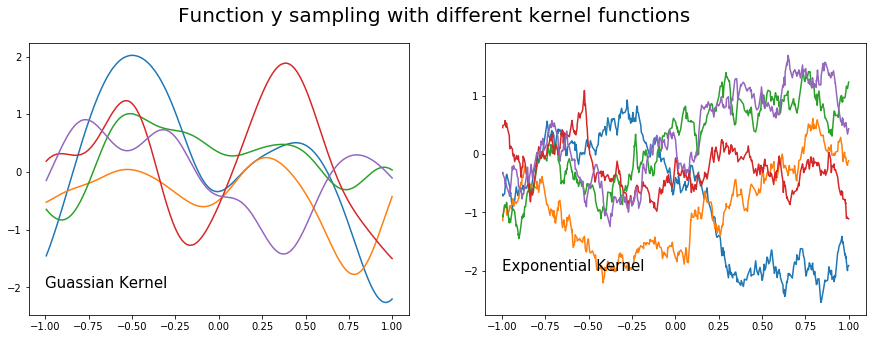

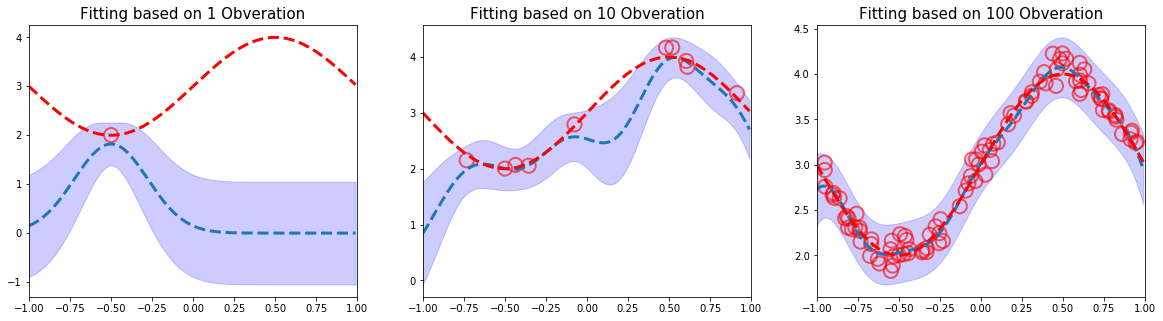

In [2]:
## Different kernel functions ##
X_uni = np.random.uniform(-1, 1, NUM)
X_uni.sort()
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle("Function y sampling with different kernel functions", fontsize = 20)
G_uni =get_grammatrix(X_uni, "Guassian")
sampling_plot(X_uni, G_uni, 5, axes[0])
axes[0].text(-1, -2, "Guassian Kernel", fontsize = 15)
G_uni =get_grammatrix(X_uni, "Exponential")
sampling_plot(X_uni, G_uni, 5, axes[1])
axes[1].text(-1, -2, "Exponential Kernel", fontsize = 15)

## Regression by Guassian process ##
X = np.arange(-1,1,0.01)
Y = np.sin(X*np.pi) + 3
xx, yy = sampling(X, size = 200, std = 1/BETA)
sequential_fitting_plot(xx, yy, X, Y)

## 2. Classification
### Algebra

In the regression problem, $y$ is a general linear function. Note that even though we get rid of basis functions, but $y$ should be a linear function of some basis functions (we could have infinite basis functions). Or in another word, a valid kernel is based on the assumption that $y$ is a linear function of some basis functions.

Thus in the classification problem, if take two-class problem as an example, we should use $y = \sigma(a)$, where $a$ is a linear function of some basis functions. 

$$
p(\boldsymbol{a}) = \mathscr(\boldsymbol{a}|\boldsymbol{0}, C), \ \ C = K + \nu I
$$

Unlike regression problem, there is usually no variance of observation. $C$ should have been only equal to $k$. We put a $\nu$ there just for the convenience of algebra. We know for two-class problem:

$$
p(t=1|a) = \sigma(a)
$$

And our goal is to determine $p(t_{N+1}|\boldsymbol{t}_N)$:

$$
p(t_{N+1}=1|\boldsymbol{t}_N) = \int p(t_{N+1}=1|a_{N+1})p(a_{N+1}|\boldsymbol{t}_{N}) da_{N+1}
$$

Now the issue is $p(a_{N+1}|\boldsymbol{t}_{N})$, whose formula is unknown. If we get its formula then we can resort to Laplace approximation. 

$$
\begin{align}
p(a_{N+1}|\boldsymbol{t}_{N}) &= \int p(a_{N+1}, \boldsymbol{a}_N|\boldsymbol{t}_{N}) d\boldsymbol{a}_N \\
&= \int p(a_{N+1}, \boldsymbol{a}_N|\boldsymbol{t}_{N}) d\boldsymbol{a}_N \\
&= \frac{1}{p(\boldsymbol{t}_{N})}\int p(a_{N+1}, \boldsymbol{a}_N)p(\boldsymbol{t}_{N}|a_{N+1}, \boldsymbol{a}_N) d\boldsymbol{a}_N \\
&= \frac{1}{p(\boldsymbol{t}_{N})}\int p(a_{N+1}| \boldsymbol{a}_N)p(\boldsymbol{a}_N)p(\boldsymbol{t}_{N}|\boldsymbol{a}_N) d\boldsymbol{a}_N \\
&= \int p(a_{N+1}| \boldsymbol{a}_N)p(\boldsymbol{a}_{N}|\boldsymbol{t}_N) d\boldsymbol{a}_N
\end{align}
$$

$p(a_{N+1}| \boldsymbol{a}_N)$ is a normal distribution $\mathscr{N}(\boldsymbol{t} |\boldsymbol{k}^TC_N^{-1}\boldsymbol{a}_N, c - \boldsymbol{k}^TC_N^{-1}\boldsymbol{k})$ and the left task is do Laplace approximation on $p(\boldsymbol{a}_{N}|\boldsymbol{t}_N)$. Since we have already known $p(\boldsymbol{t}_{N}|\boldsymbol{a}_N)$ and $p(\boldsymbol{a}_{N})$, it is easy to get $p(\boldsymbol{a}_{N}|\boldsymbol{t}_N) \propto p(\boldsymbol{t}_{N}|\boldsymbol{a}_N)p(\boldsymbol{a}_{N})$.

If $p(\boldsymbol{a}_{N}|\boldsymbol{t}_N)$ is approximated to be a normal distribution, $p(t_{N+1}|\boldsymbol{t}_N)$ is an integral between a normal distribution and a sigmoid function. Even though it is still intractable, it can be approximated in a routine way.




### Simulation
It is too much algebra for the simulaiton, thus it will be completed later on.